In [25]:
import json
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
import polars as pl

## Load

In [14]:
# Load texts
FOLDER = "/home/deniskirbaba/Documents/influai-data/embeddings/ad_prev_texts"

texts = {}
for batch_path in tqdm(Path(FOLDER).iterdir()):
    with open(batch_path, "r") as f:
        texts.update(json.load(f))

18it [00:37,  2.09s/it]


In [15]:
len(texts)

177373

In [20]:
texts["11170366"]

[[11170379,
  11170378,
  11170377,
  11170376,
  11170375,
  11170371,
  11170370,
  11170369,
  11170368,
  11170367],
 [['🇷🇺Российские военные группировки "Центр" освободили населенный пункт Тимофеевка в ДНР, сообщило Минобороны.\n\n💬 Чат: https://t.me/+vSFY5TTfYNJiMWEy\n\nИзвестияЛДНР'],
  ['🖼️В Антраците на стенах школы Олега Кошевого разместят портреты молодогвардейцев\n\n🏫 Школа №1 города Антрацита, в которой учился один из лидеров молодогвардейцев Олег Кошевой, возобновит работу после ремонта осенью 2024 года. На стенах здания разместят портреты молодогвардейцев, сообщили в правительстве Ставрополья.\n\n💬"Историческое здание не видело серьезного ремонта несколько десятков лет. К началу 2020-х оно сильно обветшало и могло быть утрачено. Помощь Ставрополья помогла школу сохранить. Капитальный ремонт завершен на 98%, к осени его полностью закончат. С нового учебного года в школе полноценно начнутся занятия. На стенах школы будут размещены портреты героев-молодогвардейцев", - говор

## Analyze length

In [39]:
# Constuct the array of len of each posts and of group of posts for ad
one_post_lengths = []
ads_posts_lengths = []

for prev_posts in tqdm(texts.values()):
    if prev_posts:
        lengths = [len(t[0]) for t in prev_posts[1]]
        one_post_lengths.extend(lengths)
        ads_posts_lengths.append(sum(lengths))
    else:
        ads_posts_lengths.append(0)

  0%|          | 0/177373 [00:00<?, ?it/s]

100%|██████████| 177373/177373 [00:00<00:00, 282693.82it/s]


In [40]:
len(one_post_lengths), len(ads_posts_lengths)

(1766026, 177373)

### Individual posts

In [41]:
pl.Series(one_post_lengths).describe()

statistic,value
str,f64
"""count""",1.766026e6
"""null_count""",0.0
"""mean""",576.319816
"""std""",596.694546
"""min""",1.0
"""25%""",181.0
"""50%""",372.0
"""75%""",780.0
"""max""",4096.0


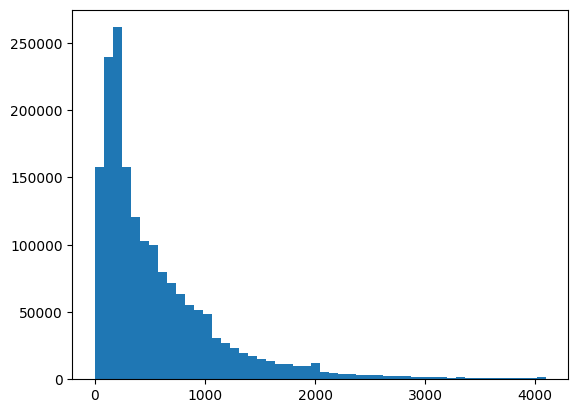

In [44]:
plt.hist(one_post_lengths, bins=50);

### Previous posts to ad post

In [43]:
pl.Series(ads_posts_lengths).describe()

statistic,value
str,f64
"""count""",177373.0
"""null_count""",0.0
"""mean""",5738.16635
"""std""",4276.376349
"""min""",0.0
"""25%""",2447.0
"""50%""",4786.0
"""75%""",7772.0
"""max""",40759.0


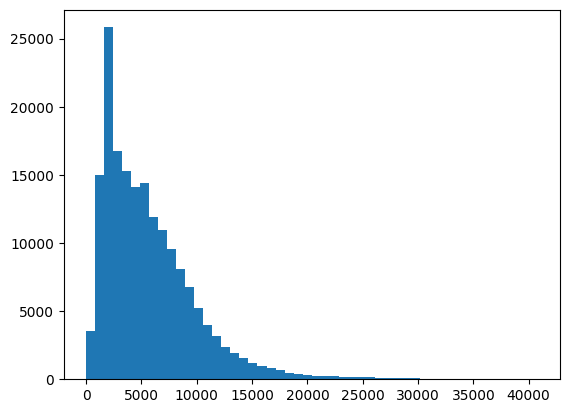

In [45]:
plt.hist(ads_posts_lengths, bins=50);

Да, в среднем длина 10 прошлых постов по отношению к рекламному = 5к символов - если переводить в токены будет примерно 2к токенов - тут прям сильно на глаз, но смысл в том, что при простой конкатенации это бы не влезло в 514 токенов.